## Data Processing Project: Sales Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

##Load the dataset

In [ ]:
df = pd.read_csv("sales_data_sample.csv", encoding='latin1')
print("Dataset loaded successfully!")

Dataset loaded successfully!


##Initial Inspection

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


##checking for duplicates

In [ ]:
df.duplicated().sum()

np.int64(0)

##remove duplicates if found

In [ ]:
if df.duplicated().sum() > 0:
  df.drop_duplicates(inplace=True)
  print("Duplicates removed successfully!")

##missing values

In [ ]:
df.isnull().sum()

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0


In [ ]:
num_col = [col for col in df.columns if df[col].dtype != 'object']
for col in num_col:
  df[col].fillna(df[col].mean(), inplace=True)

cat_col = [col for col in df.columns if df[col].dtype == 'object']
for col in cat_col:
  df[col].fillna(df[col].mode()[0], inplace=True)

print("Missing values handled successfully")

Missing values handled successfully


/tmp/ipython-input-3547498266.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-3547498266.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

##Outlier detection and removal using IQR

In [ ]:
for col in num_col:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3-q1
  lower = q1 - 1.5 * iqr
  upper = q3 + 1.5 * iqr
  df = df[(df[col] >= lower) & (df[col] <= upper)]

##Feature creation

In [ ]:
if 'PRICEEACH' in df.columns and 'QUANTITYORDERED' in df.columns:
  df['Total Price'] = df['PRICEEACH'] * df['QUANTITYORDERED']
  print("Total Price feature created successfully!")

Total Price feature created successfully!


##Feature Scaling

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[num_col])
df_scaled = pd.DataFrame(scaled_features, columns=num_col)
print("Features scaled successfully")

Features scaled successfully


##Statistical methods

                 ORDERNUMBER  QUANTITYORDERED     PRICEEACH  ORDERLINENUMBER  \
ORDERNUMBER      8385.852931        26.293529    -16.049738       -19.246692   
QUANTITYORDERED    26.293529        86.609792     -6.532926        -0.313052   
PRICEEACH         -16.049738        -6.532926    413.393978        -1.170614   
ORDERLINENUMBER   -19.246692        -0.313052     -1.170614        17.937227   
SALES            2098.236093      7365.708002  21842.987757      -253.143483   
QTR_ID             -4.893709        -0.323202      0.307617         0.181777   
MONTH_ID          -10.434679        -0.964232      0.727333         0.455060   
YEAR_ID            57.469182         0.231129     -0.181407        -0.144649   
MSRP              -14.485741       -15.222568    516.577271        -1.896321   

                        SALES    QTR_ID   MONTH_ID    YEAR_ID          MSRP  
ORDERNUMBER      2.098236e+03 -4.893709 -10.434679  57.469182    -14.485741  
QUANTITYORDERED  7.365708e+03 -0.323202  -0

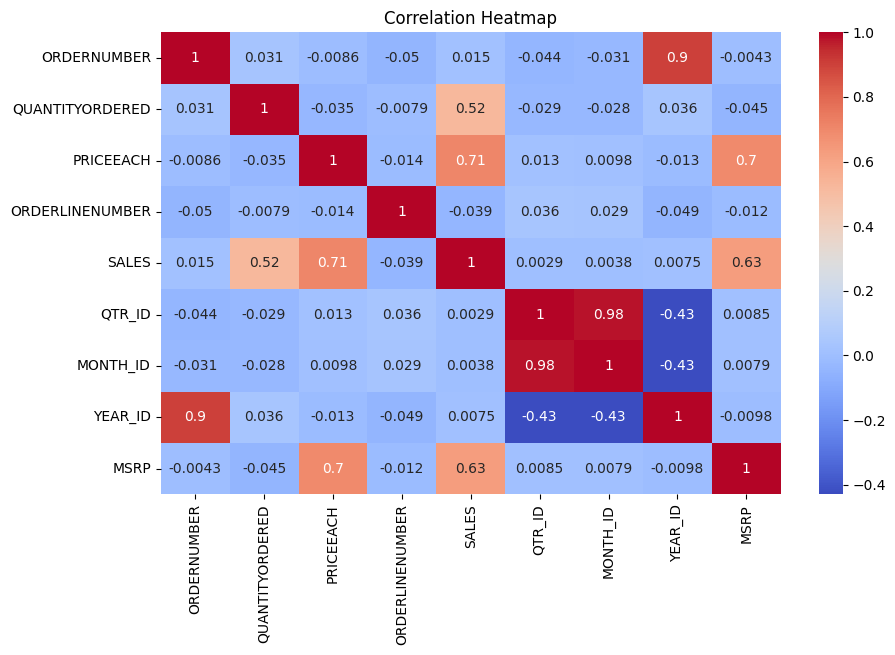

In [ ]:
print(df[num_col].cov(),"\n")
print(df[num_col].corr(),"\n")

#visualization of correlation
plt.figure(figsize=(10,6))
sns.heatmap(df[num_col].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

##Dimensionality Reduction(PCA)

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

print("Explained Variance by PCA components:", pca.explained_variance_ratio_)

Explained Variance by PCA components: [0.27251531 0.26725481]


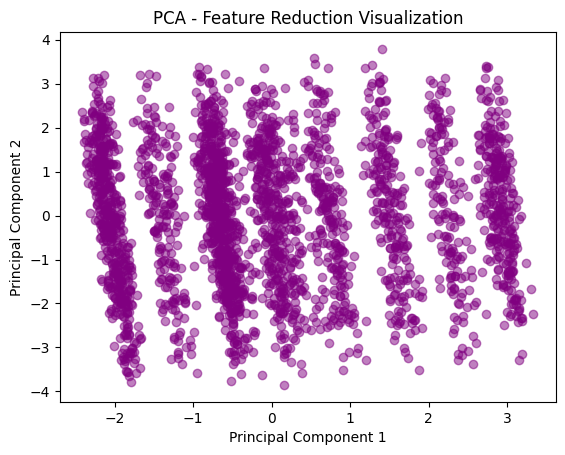

In [ ]:
plt.scatter(pca_result[:,0], pca_result[:,1], alpha=0.5, color='purple')
plt.title("PCA - Feature Reduction Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

##Cleaned data

In [ ]:
df.to_csv("Cleaned_Sales_Data.csv", index=False)
print("Cleaned Data Saved as 'Cleaned_Sales_Data.csv'")

Cleaned Data Saved as 'Cleaned_Sales_Data.csv'
